In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import cv2
import tensorflow as tf
import seaborn as sn; sn.set(font_scale=1.4)

In [2]:
class_names = ['Bicycle', 'Bus', 'Car', 'Motorcycle', 'Truck', 'Van']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)} 

nb_classes = len(class_names)
print(class_names_label)
IMAGE_SIZE = (150,150)

{'Bicycle': 0, 'Bus': 1, 'Car': 2, 'Motorcycle': 3, 'Truck': 4, 'Van': 5}


In [44]:
def load_data():
    DIR ="D:/Tanvi/PES/Sem5/302_MI/Project/FinalProject/VehicleClassification_TF/data"
    CATEGORY =['train','test']

    output=[]

    for cat in CATEGORY:
        path = os.path.join(DIR,cat)
        images =[]
        labels =[]

        print("Loading{}".format(cat))

        for folder in os.listdir(path):
            label = class_names_label[folder]
            for file in os.listdir(os.path.join(path,folder)):
                img_path = os.path.join(path,folder,file)
                
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image,IMAGE_SIZE)
                images.append(image)
                labels.append(label)
        
        images = np.array(images, dtype="float32")
        labels = np.array(labels, dtype="int32")
        output.append((images,labels))
    return output

In [90]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loadingtrain
Loadingtest


In [136]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=82)

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [138]:
model = Sequential()

In [139]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(6, activation=tf.nn.softmax))

In [140]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [141]:
history = model.fit(train_images, train_labels,epochs=17, validation_split=0.2)

Epoch 1/17
271/271 [==============================] - 234s 857ms/step - loss: 2.1398 - accuracy: 0.2533 - val_loss: 1.7389 - val_accuracy: 0.2645
Epoch 2/17
271/271 [==============================] - 211s 779ms/step - loss: 1.7175 - accuracy: 0.2807 - val_loss: 1.6911 - val_accuracy: 0.2895
Epoch 3/17
271/271 [==============================] - 190s 702ms/step - loss: 1.5915 - accuracy: 0.3513 - val_loss: 1.4694 - val_accuracy: 0.4021
Epoch 4/17
271/271 [==============================] - 197s 726ms/step - loss: 1.3885 - accuracy: 0.4411 - val_loss: 1.2459 - val_accuracy: 0.5231
Epoch 5/17
271/271 [==============================] - 197s 726ms/step - loss: 1.2328 - accuracy: 0.5135 - val_loss: 1.1989 - val_accuracy: 0.5295
Epoch 6/17
271/271 [==============================] - 177s 652ms/step - loss: 1.1081 - accuracy: 0.5675 - val_loss: 1.0551 - val_accuracy: 0.5882
Epoch 7/17
271/271 [==============================] - 187s 689ms/step - loss: 1.0159 - accuracy: 0.5993 - val_loss: 1.0044 -

In [158]:
model.save('D:/Tanvi/PES/Sem5/302_MI/Project/FinalProject/VehicleClassification_TF/model_saved.h5')

In [159]:
def plot_accuracy_loss(history):
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_acc')
    plt.title('Train_acc vs Val_acc')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label='loss')
    plt.plot(history.history['val_loss'],'ro--', label='val_loss')
    plt.title('Train_loss vs Val_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.show()

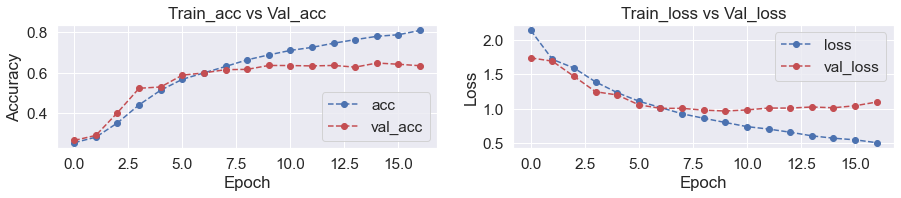

In [160]:
plot_accuracy_loss(history)

In [150]:
test_loss = model.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 120ms/step - loss: 0.9143 - accuracy: 0.8297


In [151]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

11/11 [==============================] - 1s 125ms/step


In [152]:
pred_labels

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3,
       2, 2, 2, 3, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 1, 4, 3, 4,
       4, 4, 3, 0, 1, 3, 4, 4, 4, 4, 5, 3, 5, 5, 3, 2, 2, 5, 2, 5, 4, 3,
       4, 1, 4, 1, 4, 4, 2, 4, 1, 4, 4, 4, 2, 4, 4, 4, 2, 5, 2, 4, 1, 4,
       3, 2, 2, 4, 0, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5,

In [153]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [104]:
# print(classification_report(test_labels, pred_labels, target_names=class_names))
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        53
           1       0.80      0.96      0.87        54
           2       0.80      0.87      0.83        54
           3       0.79      0.98      0.88        54
           4       0.82      0.43      0.56        54
           5       0.84      0.85      0.84        54

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.82       323
weighted avg       0.83      0.83      0.82       323

